In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\Mohamed Fawzi\Desktop\Health Care Analysis\merged_data.csv")

df.head(2)

,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type
0,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case
1,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case


In [9]:
df.describe()

,Specialty_HIPE,Total
count,452800.000000,452991.000000
mean,2619.144576,54.390059
std,2362.043475,120.792837
min,0.000000,1.000000
25%,1300.000000,3.000000
50%,1900.000000,13.000000
75%,2600.000000,53.000000
max,9000.000000,4239.000000


In [24]:
df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452991 entries, 0 to 452990
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Archive_Date    452991 non-null  datetime64[ns]
 1   Specialty_HIPE  452800 non-null  float64       
 2   Specialty_Name  452991 non-null  object        
 3   Adult_Child     452991 non-null  object        
 4   Age_Profile     452816 non-null  object        
 5   Time_Bands      452989 non-null  object        
 6   Total           452991 non-null  int64         
 7   Case_Type       452991 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [23]:
# Case Type Distribution
df_case_type = df['Case_Type'].value_counts().to_frame().reset_index()

df_case_type

,Case_Type,count
0,Outpatient,270281
1,Day Case,110487
2,Inpatient,72223


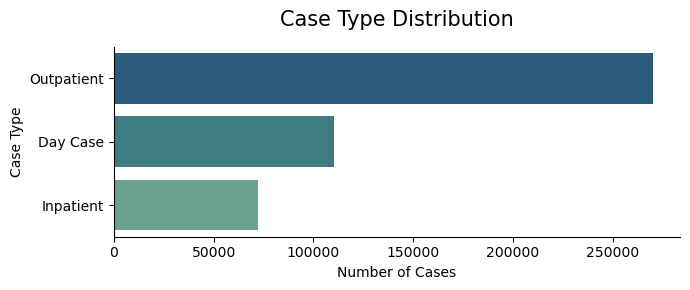

In [38]:
plt.figure(figsize = (7, 3))
sns.barplot(
    data = df_case_type,
    y = 'Case_Type',
    x = 'count',
    palette = 'crest_r',
    hue = 'Case_Type',
    
)

plt.title('Case Type Distribution', pad=15, fontsize=15)
plt.xlabel('Number of Cases')
plt.ylabel('Case Type')

sns.despine()
plt.tight_layout()
plt.show()